# National parks and biodiversity
In this project, we will look at two databases about national parks and endangered species.
1. Which species are described in the databases?
2. Which species is the most endangered? How many animals are procentually endangered? 
3. Which national parks are described in the databases? 
4. In which national park are the most observations?

In [33]:
# import libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#general observations of both databases 
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')
print(observations.head())
print(observations.describe())


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [35]:
print(species.head())
print(species.describe())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4

In [36]:
# merging databases 
merged = observations.merge(species, how = 'outer')
merged
print(merged.columns)

Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status'],
      dtype='object')


In [37]:
# specifics of species
print(species.conservation_status.unique())
print("There are 5 different conservations statusses in this database: no concern (nan), species of concern, endangered, theatened and in recovery.")
print(species.category.unique())
print("There are 7 categories of animals in this database: mammal, bird, reptile, amphibian, fish, vascular plant and nonvascular plant.")


[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
There are 5 different conservations statusses in this database: no concern (nan), species of concern, endangered, theatened and in recovery.
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
There are 7 categories of animals in this database: mammal, bird, reptile, amphibian, fish, vascular plant and nonvascular plant.


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


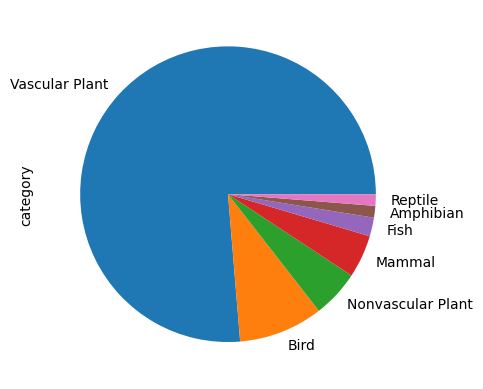

From the pie chart, we can see that the database consists for about 3/4 out of vascular plants.
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


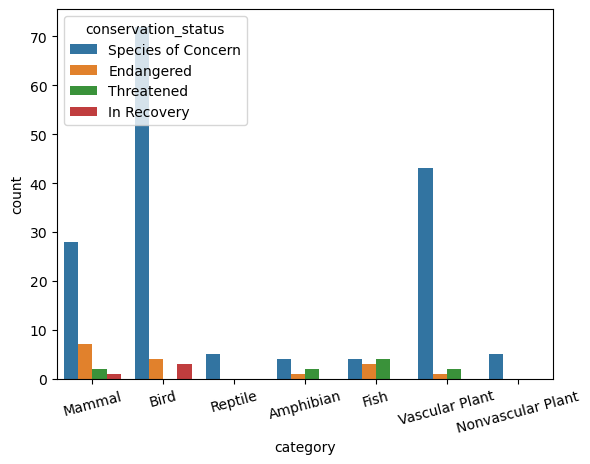

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian              0.015605     0.000000            0.062422    0.031211
Bird                   0.062422     0.046816            1.248439    0.000000
Fish                   0.046816     0.000000            0.062422    0.078027
Mammal                 0.171660     0.046816            0.655431    0.031211
Nonvascular Plant      0.000000     0.000000            0.078027    0.000000
Reptile                0.000000     0.000000            0.078027    0.000000
Vascular Plant         0.015605     0.000000            0.671036    0.031211
3.279532967032967


<Figure size 640x480 with 0 Axes>

In [38]:
print(species.groupby("category").size())
merged.category.value_counts().plot.pie()
plt.show()
plt.clf()
print("From the pie chart, we can see that the database consists for about 3/4 out of vascular plants.")

print(species.groupby("conservation_status").size())
sns.countplot(data = species, x = "category", hue = "conservation_status")
plt.xticks(rotation = 15)
plt.show()
plt.clf()
frequencies = pd.crosstab(merged.category, merged.conservation_status)
proportions = frequencies/len(merged)
print(proportions * 100)
endangered_procentually = species.conservation_status.count()/ species.category.count()
print(endangered_procentually * 100)

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64
            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46


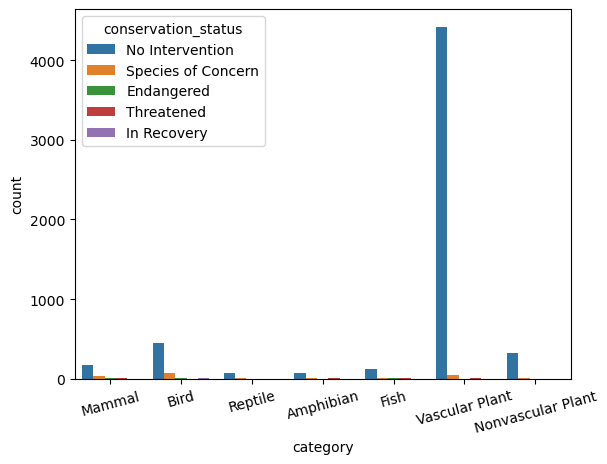

<Figure size 640x480 with 0 Axes>

In [39]:
#comparing the endangerment ratio in each category of animals
species.fillna('No Intervention', inplace=True)
print(species.groupby("conservation_status").size())

species['is_protected'] = species.conservation_status != 'No Intervention'
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

print(category_counts)
sns.countplot(data = species, x = "category", hue = "conservation_status")
plt.xticks(rotation = 15)
plt.show()
plt.clf()


category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


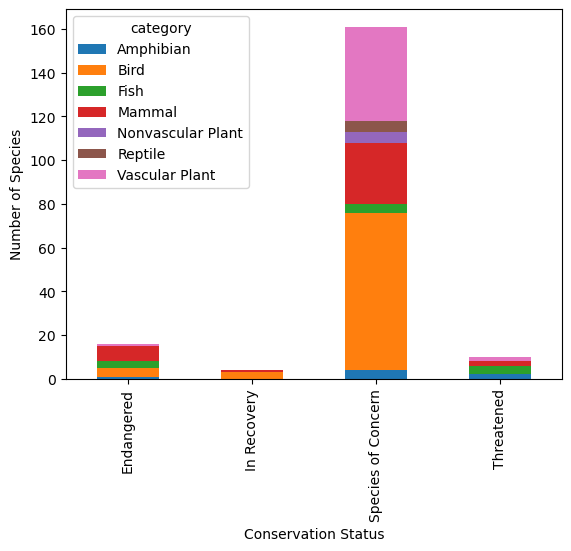

In [10]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

print(conservationCategory)
ax = conservationCategory.plot(kind = 'bar', 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

In [11]:
#number of parks
print(observations.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


3645247


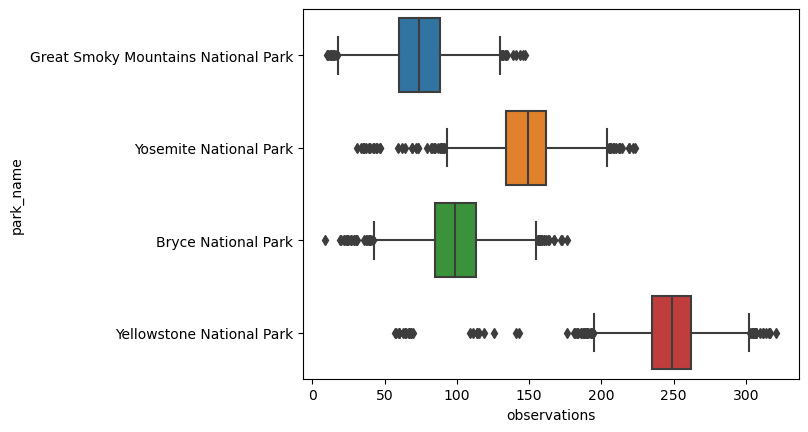

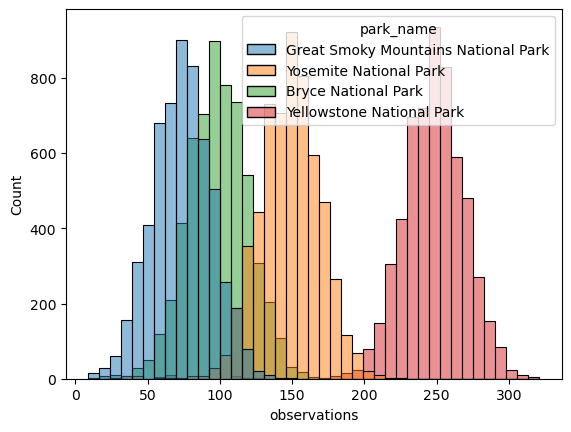

<Figure size 640x480 with 0 Axes>

In [46]:
#Observations in each park 
print(merged.observations.sum())
sns.boxplot(data = observations, x = "observations", y = "park_name")
plt.show()
plt.clf()
sns.histplot(x = "observations", data = observations, hue = "park_name", alpha = 0.5)
plt.show()
plt.clf()

## Answers
### 1. Which species are described in the databases?
There are 7 categories of animals in this database: mammal, bird, reptile, amphibian, fish, vascular plant and nonvascular plant. The most common category is the vascular plant and consists about 3/4 of all the categories(4470). With a much smaller number the bird category follows (521) and the non-vascular plants (333). The smallest groups are reptiles (79) and amphibians (80).

### 2. Which species is the most endangered? How many animals are procentually endangered? 
There are 191 animals with conservation status, which is 3.3% of all the animals in the species database. Most of them have the species of concern status (161).  
- Mammals have the highest rate of ***endangered status*** (7), followed by birds (4), fish (3), amphibians and vascular plants (1). There are no nonvascular plants or reptiles with endangered status. 
- Only birds (3) and mammals (1) have an ***in recovery status***. 
- Birds have the highest rate of ***species of concern status***  (72), followed by  vascular plants (43), mammal (28), nonvascular plants and reptiles (5) and amphibians (4).
- Fish have the highest rate of ***threatened status*** (4), followed by amphibians, mammals and vascular plants (2). Birds, nonvascular plants and reptiles do not have a threatened status. 

### 3. Which national parks are described in the databases? 
There are 4 national parks in the observation database: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park and Yellowstone National Park. 

### 4. In which national park are the most observations?
In total there are 3 645 247 animals observed in 23 296 different observations. Most observations occured in the Yellowstone National park, with a average of 250.  Next is the Yosemite National Park (average of 150), followed by the Bryce National Park (average of 100). The least amount of observed animals happened in the Great Smoky Mountains National Park (average of 75).
